<a href="https://colab.research.google.com/github/ManFromUnderground/Frog-Call-Classification-Deep-Machine-Learning/blob/main/Exploratory_Data_Analysis_and_Preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import wave
import pandas as pd
import numpy as np
import math
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline
sns.set(color_codes=True)

from sklearn.decomposition  import PCA
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
import scipy

In [ ]:
obj = wave.open('/content/drive/My Drive/data4/Soundfiles/GFL1_20230607_075958.wav','rb')
print(obj.getnchannels())
w = obj.readframes(48000*60*59)
print(type(w))

c=0
#for b in w:
  #c+=1
print(c)

#from io import StringIO
#import chardet
#enc = chardet.detect(w)
#s=str(w, enc['encoding'])

#data = StringIO(s)

#df=pd.read_csv(w)

FileNotFoundError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import scipy
one, two = scipy.io.wavfile.read('/content/drive/My Drive/data4/Soundfiles/GFL1_20230607_075958.wav','rb')

Mounted at /content/drive


In [ ]:
time_col = pd.Series(range(len(two)))

In [ ]:
df = pd.DataFrame({'Time': time_col, 'AudioData': two})
df

,Time,AudioData
0,0,1419
1,1,1268
2,2,1252
3,3,1261
4,4,1194
...,...,...
172785659,172785659,667
172785660,172785660,650
172785661,172785661,775
172785662,172785662,870


In [ ]:
one

48000

In [ ]:
#times = np.linspace(0, len(df['Time'])/one, len(df['AudioData']))
times = np.linspace(0, int((len(df['Time'])/one)/60), int((len(df['AudioData']))/60))

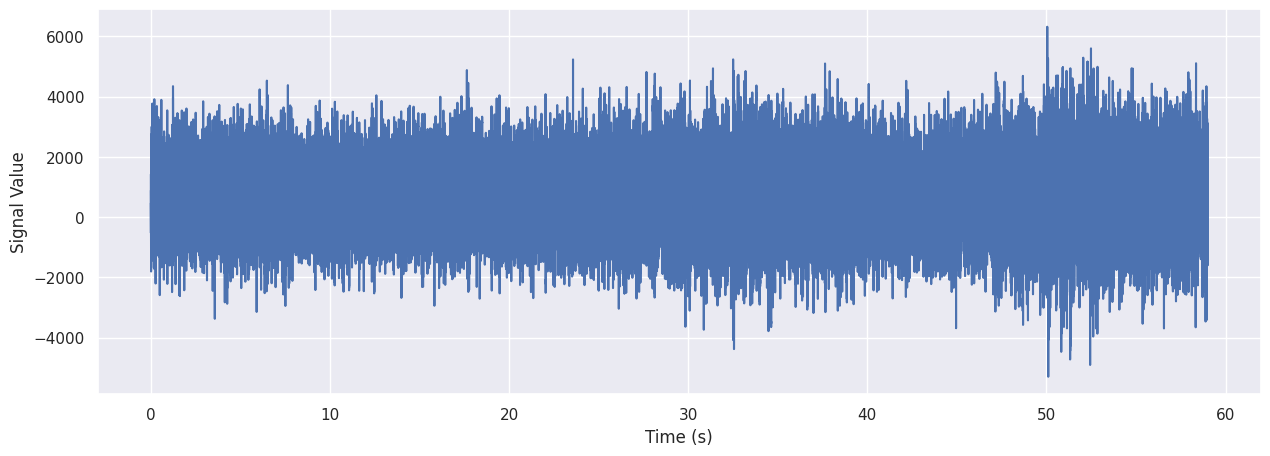

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
plt.plot(times, df['AudioData'][0:int((len(df['AudioData']))/60)])
plt.ylabel('Signal Value')
plt.xlabel('Time (s)')
##plt.xlim(0, t_audio)
plt.show()

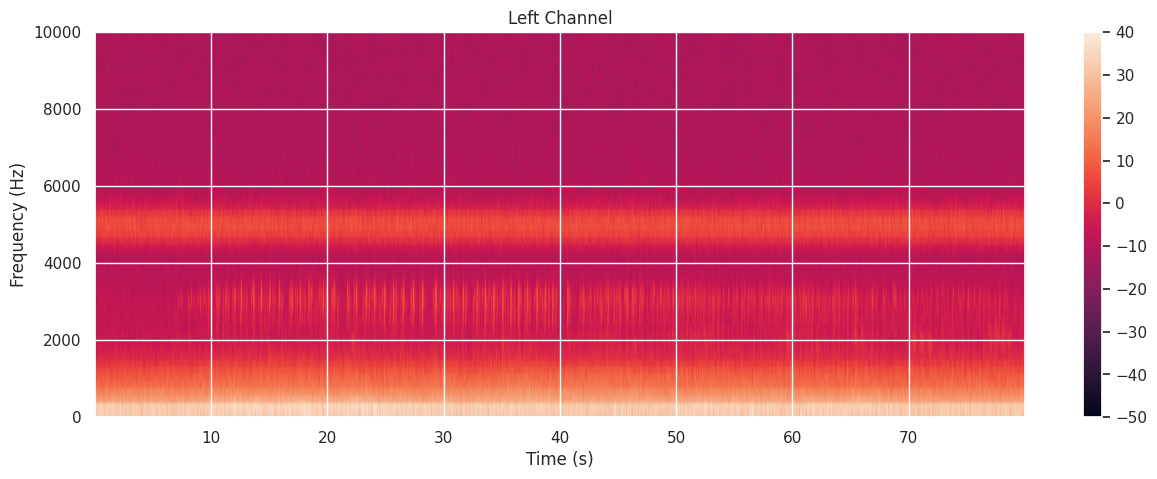

In [ ]:
plt.figure(figsize=(15, 5))
plt.specgram(df['AudioData'][480000*15:480000*23], Fs=48000, vmin=-50, vmax=40)
plt.axis(ymin=0, ymax=10000)
plt.title('Left Channel')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
#plt.xlim(0, t_audio)
plt.colorbar()
plt.show()

In [ ]:
f = open("/content/drive/My Drive/Colab Notebooks/data/Selection Tables/GFL1_20230607_075958.Table.1.selections.txt", "r")

In [ ]:
print(f.read())

Selection	View	Channel	Begin Time (s)	End Time (s)	Low Freq (Hz)	High Freq (Hz)	Species Code	Anuran or Not?	Human or Not?
1	Spectrogram 1	1	50.735387994	51.993916746	642.336	3270.073	HONK	0	1
4	Spectrogram 1	1	156.991643338	228.000000000	1167.883	3503.650	GRTR1	1	0
6	Spectrogram 1	1	220.115221970	253.341916066	934.307	2627.737	SOLE1	1	0
7	Spectrogram 1	1	253.766479983	265.457150677	759.124	1868.613	SOLE2	1	0
8	Spectrogram 1	1	265.836225602	266.184974534	583.942	2102.190	SOLE1	1	0
9	Spectrogram 1	1	280.968897218	289.373764610	58.394	2394.161	AMBU	1	0
10	Spectrogram 1	1	277.557222891	279.043196598	525.547	2043.796	SOLE2	1	0
11	Spectrogram 1	1	291.067453226	291.628484116	759.124	2277.372	SOLE1	1	0
12	Spectrogram 1	1	303.834696708	305.821049317	525.547	2218.978	SOLE2	1	0
13	Spectrogram 1	1	256.677776009	265.320684304	1109.489	3094.891	GRTR4	1	0
14	Spectrogram 1	1	273.402561710	322.247142727	817.518	3386.861	GRTR1	1	0
15	Spectrogram 1	1	376.626217652	377.141759551	233.577	2335.766	SOLE1	1	0

In [ ]:
sel = pd.read_table("/content/drive/My Drive/data4/Selection Tables/GFL1_20230607_075958.Table.1.selections.txt")
sel

,Selection,View,Channel,Begin Time (s),End Time (s),Low Freq (Hz),High Freq (Hz),Species Code,Anuran or Not?,Human or Not?
0,1,Spectrogram 1,1,50.735388,51.993917,642.336,3270.073,HONK,0,1
1,4,Spectrogram 1,1,156.991643,228.000000,1167.883,3503.650,GRTR1,1,0
2,6,Spectrogram 1,1,220.115222,253.341916,934.307,2627.737,SOLE1,1,0
3,7,Spectrogram 1,1,253.766480,265.457151,759.124,1868.613,SOLE2,1,0
4,8,Spectrogram 1,1,265.836226,266.184975,583.942,2102.190,SOLE1,1,0
...,...,...,...,...,...,...,...,...,...,...
122,132,Spectrogram 1,1,3548.550308,3550.718616,0.000,2229.508,AMBU,1,0
123,133,Spectrogram 1,1,3552.462361,3553.705727,65.574,2229.508,TRAF,0,1
124,134,Spectrogram 1,1,3536.708007,3544.395647,0.000,1442.623,TRAF,0,1
125,135,Spectrogram 1,1,0.000000,3599.701312,4114.286,5371.429,BUG,0,0


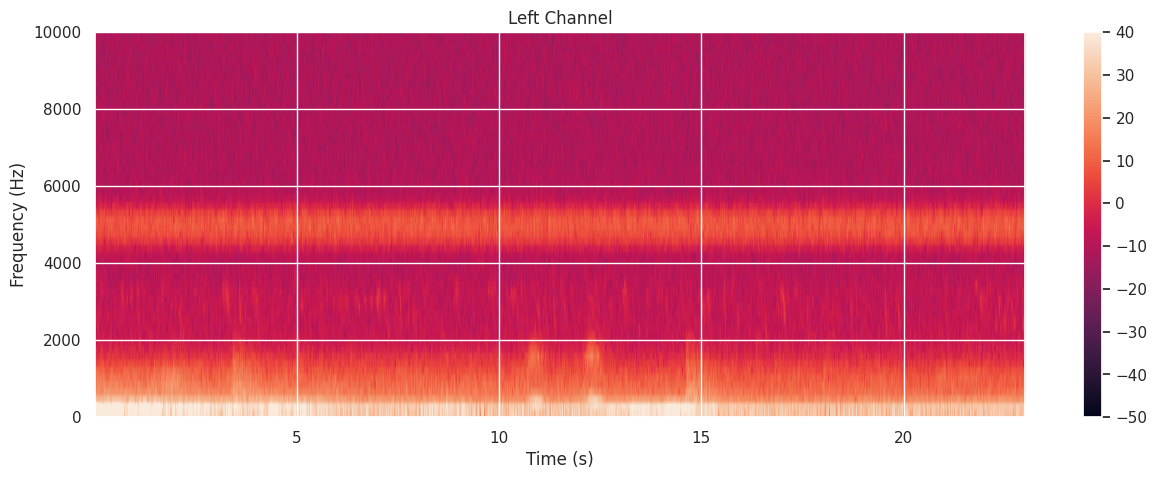

In [ ]:
t = 122
plt.figure(figsize=(15, 5))
plt.specgram(df['AudioData'][math.floor(sel['Begin Time (s)'].iloc[t])*48000-480000:math.ceil(sel['End Time (s)'].iloc[t])*48000+480000], Fs=48000, vmin=-50, vmax=40)
plt.axis(ymin=0, ymax=10000)
plt.title('Left Channel')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
#plt.xlim(0, t_audio)
plt.colorbar()
#plt.xticks(np.arange(len(a)), np.arange(1, len(a)+1))
plt.show()

In [ ]:
sel['Begin Time (s)'].iloc[0]

50.735387994

In [ ]:
frogs = ['GRTR1', 'GRTR2', 'GRTR3', 'GRTR4', 'SOLE1', 'SOLE2', 'AMBU', 'SOTO']

In [ ]:
c = 0
for s in sel['Species Code']:
  if s in frogs:
    c += 1
print(c)

96


In [ ]:
sel['Species Code'].value_counts()

SOLE1    59
SOLE2    19
TRAF     17
AMBU     11
BIRD     10
GRTR1     5
HONK      1
GRTR4     1
WATER     1
GRTR3     1
OWL       1
BUG       1
Name: Species Code, dtype: int64

In [ ]:
Xa=np.array(df)
some_digit = Xa[0]
onesec = df['AudioData'][:(len(df['AudioData'])//48000)*48000].values.reshape(len(df['AudioData'])//48000, 48000)
fivesec = df['AudioData'][:((len(df['AudioData'])//48000)-4)*48000].values.reshape(len(df['AudioData'])//240000, 48000*5)
tensec = df['AudioData'][:((len(df['AudioData'])//48000)-9)*48000].values.reshape(len(df['AudioData'])//480000, 480000)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
newsel = pd.get_dummies(sel['Species Code'])
newsel
#sel['Species Code'] = (np.array(sel['Species Code'].values)).reshape(-1, 1)
#ohe.fit([['SOLE1', 0], ['SOLE2', 1], ['TRAF', 2], ['AMBU', 3], ['BIRD', 4], ['GRTR1', 5], ['HONK', 6], ['GRTR4', 7], ['WATER', 8], ['GRTR3', 9], ['OWL', 10], ['BUG', 11]])
#ohe.fit(sel['Species Code'])

,AMBU,BIRD,BUG,GRTR1,GRTR3,GRTR4,HONK,OWL,SOLE1,SOLE2,TRAF,WATER
0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
122,1,0,0,0,0,0,0,0,0,0,0,0
123,0,0,0,0,0,0,0,0,0,0,1,0
124,0,0,0,0,0,0,0,0,0,0,1,0
125,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
total = sel.merge(newsel, left_index=True, right_index=True)
total.head()
total.shape

(127, 22)

In [ ]:
from sklearn.preprocessing import LabelEncoder
labe = LabelEncoder()
labe.fit(sel['Species Code'])

LabelEncoder()

In [ ]:
ne = labe.transform(sel['Species Code'])
ne

array([ 6,  3,  8,  9,  8,  0,  9,  8,  9,  5,  3,  8,  8,  8,  8,  8,  8,
        9,  9,  8,  0,  8,  8,  8,  8, 10, 11, 10,  8,  8,  8,  8,  8,  9,
        8,  8,  0,  8,  0,  8,  9,  8,  8,  8,  8,  9,  8,  8,  8, 10, 10,
        8,  8,  8,  8,  8,  3, 10,  8,  8,  9,  8, 10,  8,  8,  9,  9,  9,
        8,  8, 10,  8, 10,  8,  8,  0,  9,  8,  3,  8,  9,  8,  8,  8,  4,
        8,  8,  8,  8,  8,  8,  8,  8,  9,  9, 10,  9, 10,  1,  0,  8, 10,
        0,  9,  1,  3,  7, 10,  0,  1, 10,  0,  0, 10,  1,  1,  1,  1,  1,
        9,  1,  1,  0, 10, 10,  2, 10])

In [ ]:
final = sel.merge(pd.Series(ne, name='New'), left_index=True, right_index=True)
final

,Selection,View,Channel,Begin Time (s),End Time (s),Low Freq (Hz),High Freq (Hz),Species Code,Anuran or Not?,Human or Not?,New
0,1,Spectrogram 1,1,50.735388,51.993917,642.336,3270.073,HONK,0,1,6
1,4,Spectrogram 1,1,156.991643,228.000000,1167.883,3503.650,GRTR1,1,0,3
2,6,Spectrogram 1,1,220.115222,253.341916,934.307,2627.737,SOLE1,1,0,8
3,7,Spectrogram 1,1,253.766480,265.457151,759.124,1868.613,SOLE2,1,0,9
4,8,Spectrogram 1,1,265.836226,266.184975,583.942,2102.190,SOLE1,1,0,8
...,...,...,...,...,...,...,...,...,...,...,...
122,132,Spectrogram 1,1,3548.550308,3550.718616,0.000,2229.508,AMBU,1,0,0
123,133,Spectrogram 1,1,3552.462361,3553.705727,65.574,2229.508,TRAF,0,1,10
124,134,Spectrogram 1,1,3536.708007,3544.395647,0.000,1442.623,TRAF,0,1,10
125,135,Spectrogram 1,1,0.000000,3599.701312,4114.286,5371.429,BUG,0,0,2


In [ ]:
onesec = np.hstack((onesec, np.ones([onesec.shape[0], 1], onesec.dtype)))
for every in range(0, len(onesec)):
  onesec[every][48000] = -1
for n in range(0, len(sel['Selection'])):
  for t in range(math.floor(sel['Begin Time (s)'][n]), math.ceil(sel['End Time (s)'][n])):
    if t == 3600 or t == 3599 or final['New'][n] == 2 :
      continue
    onesec[t, 48000] = final['New'][n]
onesec

array([[1419, 1268, 1252, ...,  481,  470,   -1],
       [ 440,  245,  395, ...,  824,  756,   -1],
       [ 789,  719,  768, ..., 1866, 1926,   -1],
       ...,
       [ 268,  354,  451, ..., 1264, 1354,    1],
       [1386, 1329, 1367, ...,  292,  162,    1],
       [ 245,  155,  330, ..., 1095, 1077,    1]], dtype=int16)

In [ ]:
for k in range(0, len(sel['Species Code'].value_counts())):
  onesec = np.insert(onesec, [48000], [-1], 1)

In [ ]:
for n in range(0, len(sel['Selection'])):
  for t in range(math.floor(sel['Begin Time (s)'][n]), math.ceil(sel['End Time (s)'][n])):
    if t == 3600 or t == 3599:
      continue
    for j in range(0, len(newsel.iloc[n])):
      onesec[t, 47999+j+1] = newsel.iloc[n][j]
onesec

array([[1419, 1268, 1252, ...,    0,    0,   -1],
       [ 440,  245,  395, ...,    0,    0,   -1],
       [ 789,  719,  768, ...,    0,    0,   -1],
       ...,
       [ 268,  354,  451, ...,    0,    0,    1],
       [1386, 1329, 1367, ...,    0,    0,    1],
       [ 245,  155,  330, ...,    0,    0,    1]], dtype=int16)

In [ ]:
from sklearn.linear_model import LogisticRegression
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42, max_iter=5000)
ya = onesec[:,48012]
xa = onesec[:,0:48011]

from sklearn.model_selection import train_test_split
#X, y = load_and_preprocess_data()  # Load and preprocess your audio data
X_train, X_test, y_train, y_test = train_test_split(xa, ya, test_size=0.2, random_state=40)

from sklearn.decomposition  import PCA
pca=PCA()
pca.fit(X_train)
pca=PCA(n_components=.9)# this tells PCA to preeserve 90% of the variance
Xtr=pca.fit_transform(X_train)
Xtt=pca.transform(X_test)

from sklearn.preprocessing import StandardScaler
SS =StandardScaler().fit(Xtr)
X_trainS=SS.transform(Xtr)
X_testS=SS.transform(Xtt)

softmax_reg.fit(X_trainS, y_train)
softmax_reg.score(X_testS, y_test)

0.3277777777777778

In [ ]:
xa.shape

(3599, 48011)

In [ ]:
X_train.shape

(2879, 48011)

In [ ]:
Xtr.shape

(2879, 278)

In [ ]:
pd.Series(ya).value_counts()

-1     1504
 1     1004
 10     545
 3      243
 8      137
 0       51
 4       49
 9       43
 5       10
 7        9
 6        2
 11       2
dtype: int64

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(softmax_reg, X_test, y_test, cv=4)
conf_mx=confusion_matrix(y_test, y_pred)
print(conf_mx)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(


[[151   2 101  14   2   0   0   2   3  32]
 [  6   0   5   1   0   0   0   0   0   0]
 [105   1  69   6   0   0   0   1   1  19]
 [ 24   1  14   3   0   0   0   2   0   1]
 [  6   0   4   0   0   0   0   0   0   1]
 [  2   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0   0]
 [  9   0   8   2   1   0   0   0   0   2]
 [  3   0   7   0   0   0   0   0   0   1]
 [ 46   0  35   4   1   0   0   0   0  21]]


In [ ]:

one, two2 = scipy.io.wavfile.read('/content/drive/My Drive/data4/Soundfiles/GFL1_20230615_075958.wav','rb')
time_col2 = pd.Series(range(len(two2)))
df2 = pd.DataFrame({'Time': time_col2, 'AudioData': two2})
df2
sel2 = pd.read_table("/content/drive/My Drive/data4/Selection Tables/GFL1_20230615_075958.Table.1.selections.txt")
sel2
Xa2=np.array(df2)
onesec2 = df2['AudioData'][:(len(df2['AudioData'])//48000)*48000].values.reshape(len(df['AudioData'])//48000, 48000)
fivesec2 = df2['AudioData'][:((len(df2['AudioData'])//48000)-4)*48000].values.reshape(len(df['AudioData'])//240000, 48000*5)
tensec2 = df2['AudioData'][:((len(df2['AudioData'])//48000)-9)*48000].values.reshape(len(df['AudioData'])//480000, 480000)

ohe2 = OneHotEncoder()
newsel2 = pd.get_dummies(sel['Species Code'])
newsel2

total2 = sel2.merge(newsel2, left_index=True, right_index=True)
total2.head()
total2.shape
labe2 = LabelEncoder()
labe2.fit(sel['Species Code'])
ne2 = labe2.transform(sel['Species Code'])
final2 = sel2.merge(pd.Series(ne2, name='New'), left_index=True, right_index=True)

#labelencoding
onesec2 = np.hstack((onesec2, np.ones([onesec2.shape[0], 1], onesec2.dtype)))
for ones in range(0, len(onesec2)):
  onesec2[ones][48000] = -1

for n in range(0, len(sel2['Selection'])):
  for t in range(math.floor(sel2['Begin Time (s)'][n]), math.ceil(sel2['End Time (s)'][n])):
    if t == 3600 or t == 3599 or final2['New'][n] == 2 :
      continue
    onesec2[t, 48000] = final2['New'][n]

#ohe
for k in range(0, len(sel2['Species Code'].value_counts())):
  onesec2 = np.insert(onesec2, [48000], [-1], 1)

for n in range(0, len(sel2['Selection'])):
  for t in range(math.floor(sel2['Begin Time (s)'][n]), math.ceil(sel2['End Time (s)'][n])):
    if t == 3600 or t == 3599:
      continue
    for j in range(0, len(newsel2.iloc[n])):
      onesec2[t, 47999+j+1] = newsel2.iloc[n][j]
onesec2

softmax_reg2 = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42, max_iter=5000)
ya2 = onesec2[:,48012]
xa2 = onesec2[:,0:48011]

#X, y = load_and_preprocess_data()  # Load and preprocess your audio data
X_train2, X_test2, y_train2, y_test2 = train_test_split(xa2, ya2, test_size=0.2, random_state=40)

pca2=PCA(n_components=.9)# this tells PCA to preeserve 90% of the variance
Xtr2=pca2.fit_transform(X_train2)
Xtt2=pca2.transform(X_test2)

SS2 =StandardScaler().fit(Xtr2)
X_trainS2=SS2.transform(Xtr2)
X_testS2=SS2.transform(Xtt2)

softmax_reg2.fit(X_trainS2, y_train2)
softmax_reg2.score(X_testS2, y_test2)

In [ ]:
from sklearn.model_selection import train_test_split

#X, y = load_and_preprocess_data()  # Load and preprocess your audio data
X_train, X_test, y_train, y_test = train_test_split(onesec, ya, test_size=0.2, random_state=42)

In [ ]:
# Function to compute the STFT
def compute_stft(audio_signal, sampling_rate, window_size, hop_size):
    _, _, Sxx = spectrogram(audio_signal, fs=sampling_rate, window='hann', nperseg=window_size, noverlap=hop_size, mode='magnitude')
    return Sxx


# Load an audio file
audio_file = "GFL1_20230607_075958.wav"
audio_data, sample_rate = sf.read(audio_file)

# Define STFT parameters
window_size = 1024  # Size of the analysis window
hop_size = 512     # Hop size between successive windows

# Compute the STFT
stft_result = compute_stft(audio_data, sample_rate, window_size, hop_size)

# Plot the spectrogram
plt.figure(figsize=(10, 6))
plt.imshow(10 * np.log10(stft_result), origin='lower', aspect='auto', cmap='inferno')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Spectrogram')
plt.colorbar(label='dB')
plt.show()

In [ ]:
def dataext(sound, selt):
  one, two2 = scipy.io.wavfile.read(sound,'rb')
  time_col2 = pd.Series(range(len(two2)))
  df2 = pd.DataFrame({'Time': time_col2, 'AudioData': two2})
  df2
  time_col2, two2=None, None
  sel2 = pd.read_table(selt)
  return df2, selt

def datamerge(d1, s1, d2, s2):
  d3 = pd.concat([d1,d2])
  d1, d2 = None, None
  s3 = pd.concat([s1,s2])
  #s3.drop_duplicates()
  s1, s2 = None, None
  print(d3.shape)
  print(s3.shape)
  return d3, s3

def new(sound, selt, sound2, selt2):
  one, two2 = scipy.io.wavfile.read(sound,'rb')
  time_col2 = pd.Series(range(len(two2)))
  df2 = pd.DataFrame({'Time': time_col2, 'AudioData': two2})
  df2
  time_col2, two2=None, None
  sel2 = pd.read_table(selt)
  one, two2 = scipy.io.wavfile.read(sound2,'rb')
  time_col2 = pd.Series(range(len(two2)))
  df3 = pd.DataFrame({'Time': time_col2, 'AudioData': two2})
  df3
  time_col2, two2=None, None
  sel3 = pd.read_table(selt2)

  d3 = pd.concat([df2,df3])
  df2, df3 = None, None
  s3 = pd.concat([sel2,sel3])
  #s3.drop_duplicates()
  sel2, sel3 = None, None
  print(d3.shape)
  print(s3.shape)
  return d3, s3

def dataprep(df2, sel2):
  #sel2
  #Xa2=np.array(df2)
  onesec2 = df2['AudioData'][:(len(df2['AudioData'])//48000)*48000].values.reshape(len(df2['AudioData'])//48000, 48000)
  #fivesec2 = df2['AudioData'][:((len(df2['AudioData'])//48000)-4)*48000].values.reshape(len(df2['AudioData'])//240000, 48000*5)
  #tensec2 = df2['AudioData'][:((len(df2['AudioData'])//48000)-9)*48000].values.reshape(len(df2['AudioData'])//480000, 480000)
  df2=None
  ohe2 = OneHotEncoder()
  newsel2 = pd.get_dummies(sel2['Species Code'])
  #newsel2

  total2 = sel2.merge(newsel2, left_index=True, right_index=True)
  print(total2.head())
  total2.shape
  labe2 = LabelEncoder()
  labe2.fit(sel2['Species Code'])
  ne2 = labe2.transform(sel2['Species Code'])
  final2 = sel2.merge(pd.Series(ne2, name='New'), left_index=True, right_index=True)

  #labelencoding
  onesec2 = np.hstack((onesec2, np.ones([onesec2.shape[0], 1], onesec2.dtype)))
  for ones in range(0, len(onesec2)):
    onesec2[ones][48000] = -1

  for n in range(0, len(sel2['Selection'])):
    for t in range(math.floor(sel2['Begin Time (s)'].iloc[n]), math.ceil(sel2['End Time (s)'].iloc[n])):
      if t == 3600 or t == 3599 or labe2.inverse_transform([final2['New'].iloc[n]])==['BUG']:
        continue
      onesec2[t, 48000] = final2['New'].iloc[n]
  final2=None
  #ohe
  for k in range(0, len(sel2['Species Code'].value_counts())):
    onesec2 = np.insert(onesec2, [48000], [-1], 1)

  for n in range(0, len(sel2['Selection'])):
    for t in range(math.floor(sel2['Begin Time (s)'].iloc[n]), math.ceil(sel2['End Time (s)'].iloc[n])):
      if t == 3600 or t == 3599:
        continue
      for j in range(0, len(newsel2.iloc[n])):
        onesec2[t, 47999+j+1] = newsel2.iloc[n][j]
  onesec2
  newsel2=None
  ya2 = onesec2[:,-1]
  xa2 = onesec2[:,0:-1]
  return xa2, ya2

In [ ]:
d1, s1 = dataext(r'C:\Users\verno\Desktop\Y1S2\SC1015\Jupyter\CSC433\Soundfiles\GFL1_20230607_075958.wav', r"C:\Users\verno\Desktop\Y1S2\SC1015\Jupyter\CSC433\Selection Tables\GFL1_20230607_075958.Table.1.selections.txt")
d2, s2 = dataext('CSC433\Soundfiles\GFL1_20230615_075958.wav', "CSC433/Selection Tables/GFL1_20230615_075958.Table.1.selections.txt")
df2, sel2 = datamerge(d1, d2, s1, s2)
d1, d2, s1, s2 = None, None, None, None
xa2, ya2 = dataprep(df2, sel2)
df2, sel2 = None, None

In [ ]:
softmax_reg2 = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42, max_iter=5000)
#X, y = load_and_preprocess_data()  # Load and preprocess your audio data
X_train2, X_test2, y_train2, y_test2 = train_test_split(xa2, ya2, test_size=0.2, random_state=40)
pca2=PCA(n_components=.9)# this tells PCA to preserve 90% of the variance
Xtr2=pca2.fit_transform(X_train2)
Xtt2=pca2.transform(X_test2)
#pca
pca2=None
SS2 =StandardScaler().fit(Xtr2)
X_trainS2=SS2.transform(Xtr2)
X_testS2=SS2.transform(Xtt2)
SS2=None
softmax_reg2.fit(X_trainS2, y_train2)
softmax_reg2.score(X_testS2, y_test2)

In [ ]:
def dataext(sound, selt):
  one, two2 = scipy.io.wavfile.read(sound,'rb')
  time_col2 = pd.Series(range(len(two2)))
  df2 = pd.DataFrame({'Time': time_col2, 'AudioData': two2})
  df2
  time_col2, two2=None, None
  sel2 = pd.read_table(selt)
  return df2, sel2

def enc():
  codes = ['AMBU', 'BEEP', 'BIRD', 'BUG', 'CAR', 'CONC1', 'CONC2', 'CONC3', 'FISH', 'GRBH', 'GRTR', 'GRTR1', 'GRTR2', 'GRTR3', 'GRTR4', 'HONK', 'idk', 'IDK', 'MACH', 'OWL', 'PLANE', 'RUN', 'SIREN', 'SOLE1', 'SOLE2', 'SOTO', 'THUD', 'TRAF', 'TRAIN', 'WALK', 'WATER', 'WIND']
  ohe = OneHotEncoder()
  ohe.fit(np.array(codes).reshape(-1,1))
  labe = LabelEncoder()
  labe.fit(codes)
  return ohe, labe

def datamerge(d1, s1, d2, s2):
  d3 = pd.concat([d1,d2])
  d1, d2 = None, None
  s3 = pd.concat([s1,s2])
  #s3.drop_duplicates()
  s1, s2 = None, None
  print(d3.shape)
  print(s3.shape)
  return d3, s3


def dataprep(df2, sel2, window, ohe, labe):
  #sel2
  #Xa2=np.array(df2)
  if window == 1:
    onesec2 = df2['AudioData'][:(len(df2['AudioData'])//48000)*48000].values.reshape(len(df2['AudioData'])//48000, 48000)
  elif window == 5:
    fivesec2 = df2['AudioData'][:((len(df2['AudioData'])//48000)-4)*48000].values.reshape(len(df2['AudioData'])//240000, 48000*5)
  elif window == 10:
    tensec2 = df2['AudioData'][:((len(df2['AudioData'])//48000)-9)*48000].values.reshape(len(df2['AudioData'])//480000, 480000)
  else:
    print("Please input 1, 5 or 10")
    return
  df2=None
  #newsel2

  newsel = (ohe.transform(np.array(sel2['Species Code']).reshape(-1,1))).toarray()
  total2 = sel2.merge(pd.DataFrame(newsel), left_index=True, right_index=True)
  print(total2.head())
  total2.shape
  ne2 = labe.transform(sel2['Species Code'])
  final2 = sel2.merge(pd.Series(ne2, name='New'), left_index=True, right_index=True)

  #labelencoding
  onesec2 = np.hstack((onesec2, np.ones([onesec2.shape[0], 1], onesec2.dtype)))
  for ones in range(0, len(onesec2)):
    onesec2[ones][48000] = -1

  for n in range(0, len(sel2['Selection'])):
    for t in range(math.floor(sel2['Begin Time (s)'][n]), math.ceil(sel2['End Time (s)'][n])):
      if t == 3600 or t == 3599 or labe.inverse_transform([final2['New'][n]])==['BUG']:
        continue
      onesec2[t, 48000] = final2['New'][n]
  final2=None
  #ohe
  print("number of extra cols:", len(newsel[0]))
  for k in range(0, len(newsel[0])):
    onesec2 = np.insert(onesec2, [48000], [-1], 1)

  for n in range(0, len(sel2['Selection'])):
    for t in range(math.floor(sel2['Begin Time (s)'][n]), math.ceil(sel2['End Time (s)'][n])):
      if t == 3600 or t == 3599:
        continue
      for j in range(0, len(newsel[n])):
        onesec2[t, 47999+j+1] = newsel[n][j]
  onesec2
  newsel2=None
  ya2 = onesec2[:,-1]
  xa2 = onesec2[:,0:-1]
  return xa2, ya2

  def lrclf(xa, ya, softmax_reg, pca, ss):
  #softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42, max_iter=5000)
  #X, y = load_and_preprocess_data()  # Load and preprocess your audio data
  X_train2, X_test2, y_train2, y_test2 = train_test_split(xa, ya, test_size=0.2, random_state=40)

  Xtr2=pca.transform(X_train2)
  Xtt2=pca.transform(X_test2)
  #pca
  X_trainS2=ss.transform(Xtr2)
  X_testS2=ss.transform(Xtt2)
  softmax_reg.fit(X_trainS2, y_train2)
  print(softmax_reg.score(X_testS2, y_test2))
  return softmax_reg

In [ ]:
from scipy.io import wavfile
import noisereduce as nr
# load data
rate, data = wavfile.read("/content/drive/My Drive/data4/Soundfiles/GFL1_20230607_075958.wav")
# perform noise reduction
reduced_noise = nr.reduce_noise(y=data, sr=rate)
wavfile.write("mywav_reduced_noise.wav", rate, reduced_noise)

#SLICE FIRST FIVE MINUTES
from pydub import AudioSegment
#Open wav with AudioSegment
song = AudioSegment.from_wav("mywav.wav")

#In Seconds
first_five_minutes = 300 * 1000

#Slice First 5 Minutes
first_5_minutes = song[:first_five_minutes]

#Save First Five Minutes
first_5_minutes.export("first_5_minutes.wav", format="wav")

In [ ]:
len(data)

172785664

In [ ]:
rate

48000